# Introduction to Pandas

In this section we will see use of pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features.

Some features:
* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Operations
* Data Input and Output

* pandas is open source library built on top of NumPy
* used for fast anlysis,data cleaning and preparation
* good performance and productivity
* also has built in visualization features
* can work with data from a wide variety of sources

## Series

Very Simmilar to numpy array but series can have access lable(indexed by lable)


note: S in Series is UPPERCASE

In [2]:
import numpy as np
import pandas as pd

In [4]:
lables = ['a','b','c']
my_data = [10,20,30]
arr = np.array(my_data)
d = {'a':10, 'b':20, 'c':30}

In [11]:
type(pd.Series(data = my_data))

pandas.core.series.Series

In [4]:
pd.Series(arr,lables)

a    10
b    20
c    30
dtype: int32

In [5]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

#### Series Indexing and operations

In [6]:
ser1 = pd.Series([1,2,3,4],['a','b','c','d'])
ser2 = pd.Series([1,2,3,4],['a','b','x','d'])

In [12]:
ser1

a    1
b    2
c    3
d    4
dtype: int64

In [13]:
ser1['d']

4

In [9]:
ser1

a    1
b    2
c    3
d    4
dtype: int64

In [14]:
ser2

a    1
b    2
x    3
d    4
dtype: int64

In [11]:
ser1 + ser2

a    2.0
b    4.0
c    NaN
d    8.0
x    NaN
dtype: float64

In [15]:
ser1 * ser2

a     1.0
b     4.0
c     NaN
d    16.0
x     NaN
dtype: float64

# DataFrames

a bunch of different series that share the same index

In [17]:
from numpy.random import randn

In [18]:
randn(5,4)

array([[-1.09778563,  0.42460388, -0.02865293,  0.13222627],
       [ 0.88114483,  1.53006708,  0.4553345 , -0.49508943],
       [-0.97706545, -0.78881708,  0.41869972,  1.62825771],
       [ 0.45700987, -1.8270505 , -2.47602791, -0.53207716],
       [-0.26350084, -0.7769587 , -0.60415349,  0.80343797]])

In [19]:
df = pd.DataFrame(randn(5,4), [1,2,3,4,5], ['A','B','C','D'])

In [20]:
df

,A,B,C,D
1,-0.392978,0.337200,0.472683,-1.195199
2,-2.016429,-1.132396,1.024961,0.151055
3,1.124388,-2.116693,-0.130697,0.205591
4,0.813818,-0.625037,0.765814,0.147020
5,-0.610013,2.021613,0.990233,-0.069291


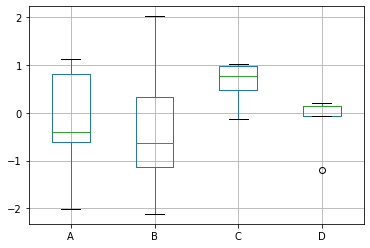

In [22]:
df.boxplot()

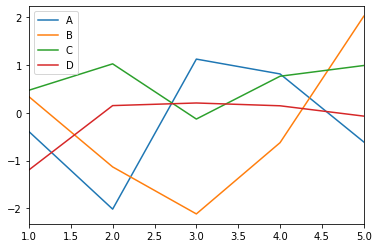

In [23]:
df.plot()

**selecting columns in dataframes**

In [18]:
df['A']

1    0.978044
2   -0.272125
3    0.163571
4    0.346895
5   -1.316381
Name: A, dtype: float64

In [19]:
df.A

1    0.978044
2   -0.272125
3    0.163571
4    0.346895
5   -1.316381
Name: A, dtype: float64

In [20]:
df[['A','B']]

,A,B
1,0.978044,0.839425
2,-0.272125,0.971002
3,0.163571,0.183854
4,0.346895,-0.249493
5,-1.316381,-0.847679


In [21]:
type(df['A'])

pandas.core.series.Series

**add new column**

In [24]:
df['new'] = df['A'] * df['B']

In [25]:
df

,A,B,C,D,new
1,-0.392978,0.337200,0.472683,-1.195199,-0.132512
2,-2.016429,-1.132396,1.024961,0.151055,2.283397
3,1.124388,-2.116693,-0.130697,0.205591,-2.379984
4,0.813818,-0.625037,0.765814,0.147020,-0.508666
5,-0.610013,2.021613,0.990233,-0.069291,-1.233211


**drop column**

In [28]:
# inplace is just like commit in SQL
df.drop('new',axis=1,inplace=True)

In [29]:
df

,A,B,C,D
1,-0.392978,0.337200,0.472683,-1.195199
2,-2.016429,-1.132396,1.024961,0.151055
3,1.124388,-2.116693,-0.130697,0.205591
4,0.813818,-0.625037,0.765814,0.147020
5,-0.610013,2.021613,0.990233,-0.069291


**drop/delete row**

In [26]:
df.drop(5,axis=0)

,A,B,C,D
1,0.978044,0.839425,0.845619,-0.775044
2,-0.272125,0.971002,1.360285,0.512388
3,0.163571,0.183854,-0.155056,-1.136741
4,0.346895,-0.249493,0.240593,-0.001584


In [27]:
df

,A,B,C,D
1,0.978044,0.839425,0.845619,-0.775044
2,-0.272125,0.971002,1.360285,0.512388
3,0.163571,0.183854,-0.155056,-1.136741
4,0.346895,-0.249493,0.240593,-0.001584
5,-1.316381,-0.847679,0.105052,-0.586836


**Selecting rows**

There are two ways:
* Lable based index
* Numerical index

In [28]:
# note this weird behavior of pandas where method is called by a []
df.loc[3]

A    0.163571
B    0.183854
C   -0.155056
D   -1.136741
Name: 3, dtype: float64

In [29]:
df.loc[[3,4]]

,A,B,C,D
3,0.163571,0.183854,-0.155056,-1.136741
4,0.346895,-0.249493,0.240593,-0.001584


In [30]:
df.iloc[3]

A    0.346895
B   -0.249493
C    0.240593
D   -0.001584
Name: 4, dtype: float64

In [31]:
df.loc[3,'C']

-0.15505580213402825

In [32]:
df.loc[[3,4],['A','B']]

,A,B
3,0.163571,0.183854
4,0.346895,-0.249493


## Conditional Selection 

In [30]:
df = pd.DataFrame(randn(5,4), [1,2,3,4,5], ['A','B','C','D'])

In [31]:
df

,A,B,C,D
1,-0.968933,-0.240280,-2.070541,-1.850325
2,1.649635,0.807476,3.665697,1.035401
3,1.737711,-0.477286,-0.510918,-0.941862
4,1.503078,0.789967,0.819960,-0.793193
5,-0.632157,-0.600748,-0.322501,0.392921


In [33]:
df[df > 0]

,A,B,C,D
1,NaN,NaN,NaN,NaN
2,1.649635,0.807476,3.665697,1.035401
3,1.737711,NaN,NaN,NaN
4,1.503078,0.789967,0.819960,NaN
5,NaN,NaN,NaN,0.392921


In [36]:
df[df > 0]

,A,B,C,D
1,NaN,NaN,1.203805,NaN
2,0.860238,1.474909,0.683772,NaN
3,NaN,NaN,NaN,NaN
4,1.478209,NaN,0.267228,0.736571
5,0.757133,1.644021,NaN,NaN


In [36]:
df

,A,B,C,D
1,-0.968933,-0.240280,-2.070541,-1.850325
2,1.649635,0.807476,3.665697,1.035401
3,1.737711,-0.477286,-0.510918,-0.941862
4,1.503078,0.789967,0.819960,-0.793193
5,-0.632157,-0.600748,-0.322501,0.392921


In [37]:
df['B']>0

1    False
2     True
3    False
4     True
5    False
Name: B, dtype: bool

In [38]:
df[df['B']>0]

,A,B,C,D
2,1.649635,0.807476,3.665697,1.035401
4,1.503078,0.789967,0.819960,-0.793193


In [40]:
df[df['B']>0][['A','C']]

,A,C
2,0.860238,0.683772
5,0.757133,-0.153692


In [39]:
# in the above cell we did the below operations
boolser = df['B'] > 0
result = df[boolser]
mycols = ['A','C']
f_res = result[mycols]

In [40]:
f_res

,A,C
2,1.649635,3.665697
4,1.503078,0.819960


In [41]:
df

,A,B,C,D
1,-0.968933,-0.240280,-2.070541,-1.850325
2,1.649635,0.807476,3.665697,1.035401
3,1.737711,-0.477286,-0.510918,-0.941862
4,1.503078,0.789967,0.819960,-0.793193
5,-0.632157,-0.600748,-0.322501,0.392921


In [42]:
# AND operator
df[(df['B'] < 0) & (df['D'] < 0)]

,A,B,C,D
1,-0.968933,-0.240280,-2.070541,-1.850325
3,1.737711,-0.477286,-0.510918,-0.941862


In [45]:
df[(df[['B','D']] < 0)]

,A,B,C,D
1,NaN,-0.240280,NaN,-1.850325
2,NaN,NaN,NaN,NaN
3,NaN,-0.477286,NaN,-0.941862
4,NaN,NaN,NaN,-0.793193
5,NaN,-0.600748,NaN,NaN


In [46]:
#OR operator
(df['D'] < 0) | (df['B'] > 1)

1     True
2    False
3     True
4     True
5    False
dtype: bool

In [47]:
df[(df['D'] < 0) | (df['B'] > 1)]

,A,B,C,D
1,-0.968933,-0.240280,-2.070541,-1.850325
3,1.737711,-0.477286,-0.510918,-0.941862
4,1.503078,0.789967,0.819960,-0.793193


In [48]:
df

,A,B,C,D
1,-0.968933,-0.240280,-2.070541,-1.850325
2,1.649635,0.807476,3.665697,1.035401
3,1.737711,-0.477286,-0.510918,-0.941862
4,1.503078,0.789967,0.819960,-0.793193
5,-0.632157,-0.600748,-0.322501,0.392921


### SET & RESET INDEX

* Specify **inplace = True** for permanent change

In [49]:
df.reset_index()

,index,A,B,C,D
0,1,-0.968933,-0.240280,-2.070541,-1.850325
1,2,1.649635,0.807476,3.665697,1.035401
2,3,1.737711,-0.477286,-0.510918,-0.941862
3,4,1.503078,0.789967,0.819960,-0.793193
4,5,-0.632157,-0.600748,-0.322501,0.392921


In [50]:
df

,A,B,C,D
1,-0.968933,-0.240280,-2.070541,-1.850325
2,1.649635,0.807476,3.665697,1.035401
3,1.737711,-0.477286,-0.510918,-0.941862
4,1.503078,0.789967,0.819960,-0.793193
5,-0.632157,-0.600748,-0.322501,0.392921


In [51]:
new_ind = ['MH', 'RJ', 'KA', 'TN', 'WB']

In [52]:
new_ind

['MH', 'RJ', 'KA', 'TN', 'WB']

In [53]:
'MH RJ KA TN WB'.split()

['MH', 'RJ', 'KA', 'TN', 'WB']

In [54]:
df['States'] = new_ind

In [55]:
df

,A,B,C,D,States
1,-0.968933,-0.240280,-2.070541,-1.850325,MH
2,1.649635,0.807476,3.665697,1.035401,RJ
3,1.737711,-0.477286,-0.510918,-0.941862,KA
4,1.503078,0.789967,0.819960,-0.793193,TN
5,-0.632157,-0.600748,-0.322501,0.392921,WB


In [56]:
df.set_index('States')

,A,B,C,D
States,,,,
MH,-0.968933,-0.240280,-2.070541,-1.850325
RJ,1.649635,0.807476,3.665697,1.035401
KA,1.737711,-0.477286,-0.510918,-0.941862
TN,1.503078,0.789967,0.819960,-0.793193
WB,-0.632157,-0.600748,-0.322501,0.392921


## Multi Level Index

In [59]:
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
tuple_index = list(zip(outside,inside))
multi_index = pd.MultiIndex.from_tuples(tuple_index)

In [60]:
tuple_index

[('G1', 1), ('G1', 2), ('G1', 3), ('G2', 1), ('G2', 2), ('G2', 3)]

In [61]:
multi_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [62]:
df1 = pd.DataFrame(randn(6,2),multi_index,['A','B'])

In [64]:
df1

A         B
G1 1 -1.117417 -0.393165
   2  1.169370  0.058507
   3 -0.203672 -1.388441
G2 1 -1.025891 -1.311904
   2 -0.464911  0.553110
   3 -0.478934  1.204020

In [65]:
df1.loc['G1']

,A,B
1,-1.117417,-0.393165
2,1.169370,0.058507
3,-0.203672,-1.388441


In [66]:
df1.loc['G1'].loc[2,'A']

1.1693695838376852

In [67]:
df1

A         B
G1 1 -1.117417 -0.393165
   2  1.169370  0.058507
   3 -0.203672 -1.388441
G2 1 -1.025891 -1.311904
   2 -0.464911  0.553110
   3 -0.478934  1.204020

In [68]:
df1.index.names = ['Grp','Num']

In [69]:
df1

A         B
Grp Num                    
G1  1   -1.117417 -0.393165
    2    1.169370  0.058507
    3   -0.203672 -1.388441
G2  1   -1.025891 -1.311904
    2   -0.464911  0.553110
    3   -0.478934  1.204020

**Cross-Section(xs)**

In [67]:
df1

A         B
Grp Num                    
G1  1   -0.189901  0.903104
    2   -3.094205  1.115386
    3    0.292591  1.087871
G2  1   -0.331089  0.130255
    2    0.485530  0.235880
    3    0.368964 -0.552756

In [68]:
df1.xs(('G1',1))

A   -0.189901
B    0.903104
Name: (G1, 1), dtype: float64

In [69]:
df1.xs(1,level = 'Num')

,A,B
Grp,,
G1,-0.189901,0.903104
G2,-0.331089,0.130255


# Missing Data

In [70]:
d = {'A':[1,2,np.nan], 'B':[5,np.nan,np.nan], 'C':[1,2,3]}

In [71]:
d

{'A': [1, 2, nan], 'B': [5, nan, nan], 'C': [1, 2, 3]}

In [72]:
df2 = pd.DataFrame(d)

In [73]:
df2

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [74]:
df2.dropna()

,A,B,C
0,1.0,5.0,1


In [75]:
df2.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [76]:
df2.dropna(axis=1,thresh=2)

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [74]:
df2

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [77]:
df2.fillna(value=0)

,A,B,C
0,1.0,5.0,1
1,2.0,0.0,2
2,1.5,0.0,3


In [78]:
df2['A'].fillna(value=df2['A'].mean(),inplace= True)

In [79]:
df2

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,1.5,NaN,3


# Groupby

In [80]:
data = {'team':['IND','AUS','IND','AUS'],
       'Player':['Virat','Smith','Rahul','Warner'],
       'runs':[120,95,90,110]}

In [81]:
data

{'team': ['IND', 'AUS', 'IND', 'AUS'],
 'Player': ['Virat', 'Smith', 'Rahul', 'Warner'],
 'runs': [120, 95, 90, 110]}

In [88]:
cric = pd.DataFrame(data)

In [89]:
cric

,team,Player,runs
0,IND,Virat,120
1,AUS,Smith,95
2,IND,Rahul,90
3,AUS,Warner,110


In [86]:
grp_by = cric.groupby('team')

In [87]:
grp_by

In [85]:
cric.groupby('team').count()

,Player,runs
team,,
AUS,2,2
IND,2,2


In [87]:
grp_by.sum()

,runs
team,
AUS,205
IND,210


In [88]:
grp_by.max()

,Player,runs
team,,
AUS,Warner,110
IND,Virat,120


In [89]:
grp_by.min()

,Player,runs
team,,
AUS,Smith,95
IND,Rahul,90


In [90]:
grp_by.std()

,runs
team,
AUS,10.606602
IND,21.213203


In [91]:
grp_by.describe().transpose()

team               AUS         IND
runs count    2.000000    2.000000
     mean   102.500000  105.000000
     std     10.606602   21.213203
     min     95.000000   90.000000
     25%     98.750000   97.500000
     50%    102.500000  105.000000
     75%    106.250000  112.500000
     max    110.000000  120.000000

# Merging , Joining and Concatenating 

In [90]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [91]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [92]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [95]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [96]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [97]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


## Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. 
It is just like **UNION ALL** from SQL
You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [98]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [99]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


## Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [100]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']}) 

In [101]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [102]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [103]:
pd.merge(right,left,how = 'inner',on = 'key')

,key,C,D,A,B
0,K0,C0,D0,A0,B0
1,K1,C1,D1,A1,B1
2,K2,C2,D2,A2,B2
3,K3,C3,D3,A3,B3


In [104]:
left1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right1 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [105]:
left1

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [106]:
right1

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [107]:
pd.merge(left1,right1,on = ['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [108]:
pd.merge(left1,right1,how = 'right',on = ['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [109]:
pd.merge(left1,right1,how = 'left',on = ['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [110]:
pd.merge(left1,right1,how = 'outer',on = ['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


## Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.
>>**Almost same as merge but, here the joining takes place at the index not the columns**

In [111]:
left2 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [112]:
left2

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [113]:
right2

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [114]:
left2.join(right2)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [115]:
left2.join(right2, how = 'outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [116]:
left2.join(right2, how = 'left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [117]:
left2.join(right2, how = 'right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# Operations

There are lots of operations with pandas that will be really useful

In [118]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [119]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Info on Unique Values

In [120]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [121]:
len(df['col2'].unique())

3

In [122]:
df['col2'].nunique()

3

In [123]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

## Selecting Data

In [124]:
#Select from DataFrame using criteria from multiple columns

newdf = df[(df['col1']>2) & (df['col2']==444)]

In [125]:
newdf

,col1,col2,col3
3,4,444,xyz


## Applying Functions

In [126]:
def square_num(x):
    return x ** 2

In [127]:
df['col1']

0    1
1    2
2    3
3    4
Name: col1, dtype: int64

In [128]:
# apply()
df['col1'].apply(square_num)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

In [129]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [130]:
df['col1'].apply(lambda x: x **2)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

In [131]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [132]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [133]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [134]:
df.sort_values('col2')

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


In [135]:
df.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


In [136]:
df['col1'].sum()

10

In [137]:
#permanently drop column
del df['col1']

In [138]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


## Pivot tables

In [139]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)

In [140]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [141]:
df.pivot_table(values = 'D', index = ['A','B'], columns = 'C')

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

# Data Input and Output

This notebook is the reference code for getting input and output, pandas can read a variety of file types using its **pd.read_** methods. Let's take a look at the most common data types:

* **CSV**
* **Excel**
* **HTML**
* **SQL**

In [142]:
#to know path of notebook

In [145]:
pwd

'C:\\Users\\nayak.AREZZOSKY\\Desktop\\Simant_python_ds_ml\\my_notebooks'

## CSV

In [146]:
pd.read_csv('C:\\Users\\nayak.AREZZOSKY\\Desktop\\Simant_python_ds_ml\\my_notebooks\\csv\\read_csv')

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [147]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [149]:
df.to_csv('C:\\Users\\nayak.AREZZOSKY\\Desktop\\Simant_python_ds_ml\\my_notebooks\\csv\\to_csv',index = False)

## Excel

In [152]:
pd.read_excel('C:\\Users\\nayak.AREZZOSKY\\Desktop\\Simant_python_ds_ml\\my_notebooks\\xls\\read_excel.xlsx',sheet_name='Sheet1')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [154]:
df = pd.read_excel('C:\\Users\\nayak.AREZZOSKY\\Desktop\\Simant_python_ds_ml\\my_notebooks\\xls\\read_excel.xlsx',sheet_name='Sheet1')

In [155]:
df

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [156]:
df.to_excel('C:\\Users\\nayak.AREZZOSKY\\Desktop\\Simant_python_ds_ml\\my_notebooks\\xls\\to_excel.xlsx',sheet_name='out')

In [159]:
df = pd.read_excel('C:\\Users\\nayak.AREZZOSKY\\Desktop\\Simant_python_ds_ml\\my_notebooks\\xls\\to_excel.xlsx',sheet_name='out')

In [160]:
df

,Unnamed: 0,Unnamed: 0.1,a,b,c,d
0,0,0,0,1,2,3
1,1,1,4,5,6,7
2,2,2,8,9,10,11
3,3,3,12,13,14,15


## HTML

You may need to install htmllib5,lxml, and BeautifulSoup4. In your terminal/command prompt run:

    conda install lxml
    conda install html5lib
    conda install BeautifulSoup4

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

Pandas can read table tabs off of html. For example:

In [161]:
df1 = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [162]:
df1[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
1,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
2,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
3,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
4,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"
...,...,...,...,...,...,...
555,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
556,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
557,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
558,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


## SQL

The **pandas.io.sql** module provides a collection of query wrappers to both facilitate data retrieval and to reduce dependency on DB-specific API. Database abstraction is provided by **SQLAlchemy** if installed. In addition you will need a driver library for your database. Examples of such drivers are psycopg2 for PostgreSQL or pymysql for MySQL. For SQLite this is included in Python’s standard library by default. You can find an overview of supported drivers for each SQL dialect in the SQLAlchemy docs.


If SQLAlchemy is not installed, a fallback is only provided for sqlite (and for mysql for backwards compatibility, but this is deprecated and will be removed in a future version). This mode requires a Python database adapter which respect the Python DB-API.

See also some cookbook examples for some advanced strategies.

The key functions are:

* read_sql_table(table_name, con[, schema, ...])	
    * Read SQL database table into a DataFrame.
* read_sql_query(sql, con[, index_col, ...])	
    * Read SQL query into a DataFrame.
* read_sql(sql, con[, index_col, ...])	
    * Read SQL query or database table into a DataFrame.
* DataFrame.to_sql(name, con[, flavor, ...])	
    * Write records stored in a DataFrame to a SQL database.

In [163]:
from sqlalchemy import create_engine

In [164]:
engine = create_engine('sqlite:///:memory:')

In [165]:
df

,Unnamed: 0,Unnamed: 0.1,a,b,c,d
0,0,0,0,1,2,3
1,1,1,4,5,6,7
2,2,2,8,9,10,11
3,3,3,12,13,14,15


In [166]:
df.to_sql('my_table',con = engine)

In [167]:
sql_df = pd.read_sql('my_table',con = engine)

In [168]:
sql_df

,index,Unnamed: 0,Unnamed: 0.1,a,b,c,d
0,0,0,0,0,1,2,3
1,1,1,1,4,5,6,7
2,2,2,2,8,9,10,11
3,3,3,3,12,13,14,15


In [169]:
pd.read_sql_query('select a from my_table',con = engine)

,a
0,0
1,4
2,8
3,12


## Thank you